![Texto alternativo](https://laserud.co/wp-content/uploads/2020/05/cropped-LOGOLASER-1.jpg "Grupo LASER")

# Algoritmo de Discriminante Linear

Es un algoritmo que consiste en la inclusion de los datos en un subespacio vectorial donde maximiza la distancia entre los atributos que pertenezcan a la misma clase soportado en el uso de estimadores bayesianos; incluso logrando reducciones en las dimensiones para efectos de la clasificación.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo de Discriminante Lineal; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html">aquí</a>

In [1]:
!pip install sklearn

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Ahora vamos a agregar la librería que contiene el modelo de Naive Bayes y la librería datetime, puesto que vamos a crear una función **linear_discriminant_algorithm** que recibe como parametro las variables **train_data, x_variables, y_variable** que hacen referencia el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import datetime

def linear_discriminant_algorithm(train_data, x_variables, y_variable):
    x_train = train_data[x_variables]
    y_train = train_data[[y_variable]]
    
    start_time = datetime.datetime.now()
    
    model = LinearDiscriminantAnalysis()
    model.fit(x_train,y_train.values.ravel())
    
    elapsed_time = datetime.datetime.now() - start_time
    
    return model, (elapsed_time.total_seconds() * 1000)


En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [3]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
data_stream = requests.get(url).content

import io

headers = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
x_columns =  ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
target_column_name = 'type'
y_columns = [target_column_name]
target_classes_name = ['1', '2', '3', '4', '5', '6', '7']

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación del algoritmo de discriminante lineal con el siguiente fragmento de código:

In [5]:
# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [6]:
train_data.describe()

,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.442623,0.180328,0.606557,0.393443,0.262295,0.311475,0.540984,0.606557,0.819672,0.786885,0.098361,0.147541,2.868852,0.737705,0.098361,0.393443,2.852459
std,0.500819,0.387651,0.492568,0.492568,0.443533,0.466940,0.502453,0.492568,0.387651,0.412907,0.300273,0.357588,1.961933,0.443533,0.300273,0.492568,2.064268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
train_data.corr(method='pearson')

,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.417978,-0.768655,0.836217,-0.156213,-0.528099,-0.172639,0.379897,0.074589,0.463760,-0.072674,-0.370734,0.551969,0.006150,0.148983,0.430846,-0.483905
feathers,-0.417978,1.000000,0.377760,-0.377760,0.689671,-0.039246,-0.081360,-0.582380,0.220000,0.244097,-0.154919,-0.195133,-0.209441,0.279682,-0.011736,-0.203189,-0.195303
eggs,-0.768655,0.377760,1.000000,-0.931306,0.403952,0.396770,-0.001104,-0.648649,-0.377760,-0.337190,0.153326,0.240438,-0.226748,-0.251376,-0.072045,-0.519144,0.695964
milk,0.836217,-0.377760,-0.931306,1.000000,-0.403952,-0.396770,0.001104,0.579955,0.377760,0.419137,-0.266011,-0.240438,0.295734,0.251376,0.072045,0.587838,-0.728747
airbone,-0.156213,0.689671,0.403952,-0.403952,1.000000,-0.159631,-0.348190,-0.664082,-0.204994,0.310316,0.053340,-0.248069,0.116802,-0.068056,0.053340,-0.403952,0.097583
aquatic,-0.528099,-0.039246,0.396770,-0.396770,-0.159631,1.000000,0.335394,0.034450,0.039246,-0.687303,0.134459,0.618539,-0.391298,-0.001319,-0.103280,-0.179378,0.342420
predator,-0.172639,-0.081360,-0.001104,0.001104,-0.348190,0.335394,1.000000,0.200923,0.166928,-0.238369,0.083304,0.104928,-0.163528,0.049041,-0.358569,0.135788,-0.018176
toother,0.379897,-0.582380,-0.648649,0.579955,-0.664082,0.034450,0.200923,1.000000,0.582380,-0.091350,0.040641,0.335061,-0.209501,0.358930,0.040641,0.373874,-0.467827
backbone,0.074589,0.220000,-0.377760,0.377760,-0.204994,0.039246,0.166928,0.582380,1.000000,0.172404,-0.131447,0.195133,-0.426068,0.786607,0.011736,0.377760,-0.825256
breathes,0.463760,0.244097,-0.337190,0.419137,0.310316,-0.687303,-0.238369,-0.091350,0.172404,1.000000,-0.096962,-0.686529,0.458693,0.053709,0.037463,0.173297,-0.506796


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

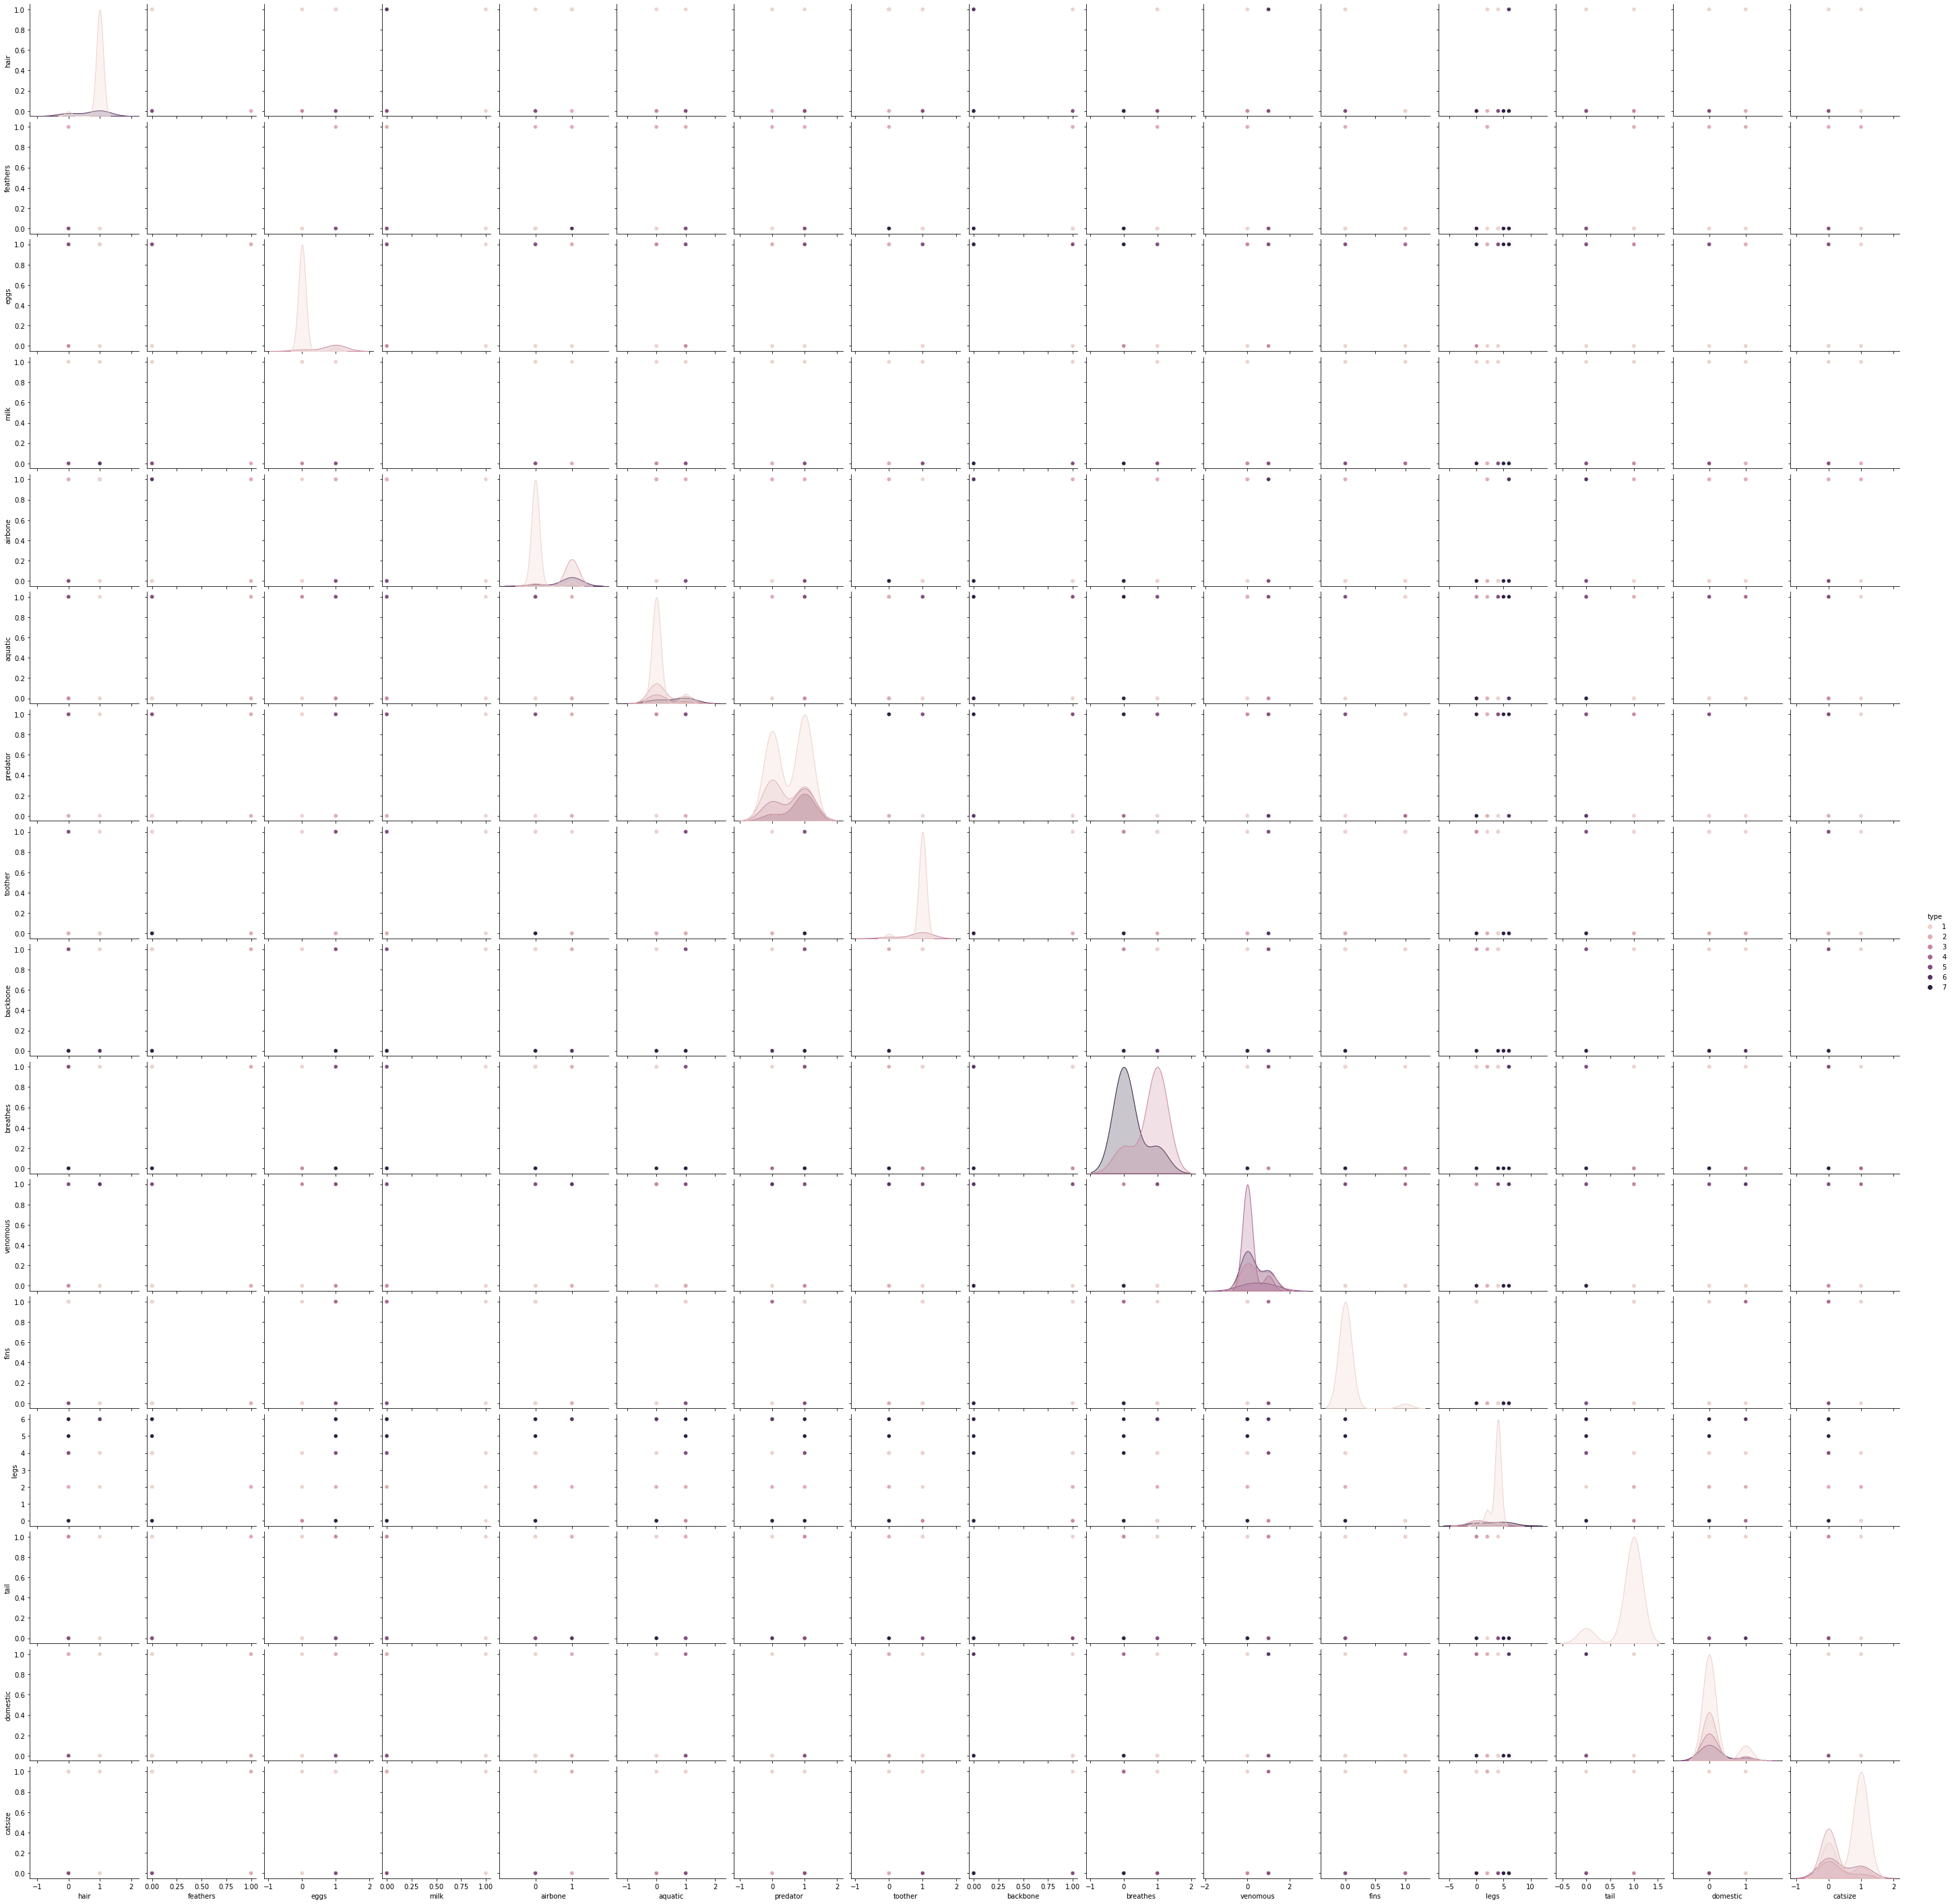

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data, hue=target_column_name)
plt.show()

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **linear_discriminant_algorithm** definida previamente en esta guía, pasando como parametros:
1. El conjunto de datos de entrenamiento
2. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
3. La el nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

In [9]:
# En la siguiente linea vamos a marcar los nombres de las variables independientes
x_columns = ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
y_column = 'type'
model, train_elapsed_time = linear_discriminant_algorithm(train_data, x_columns, y_column)

Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

In [10]:
start_time = datetime.datetime.now()

predictions = model.predict(test_data[x_columns])
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions

array([1, 4, 1, 1, 4, 1, 7, 2, 6, 1, 1, 1, 1, 2, 4, 2, 6, 1, 1, 5, 7, 2,
       2, 2, 4, 4, 1, 1, 1, 6, 1, 1, 7, 2, 1, 2, 5, 2, 1, 7], dtype=int64)

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [12]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [13]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_data[y_column])
algorithm_scores.loc[len(algorithm_scores)] = ['Discriminante Lineal', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [14]:
algorithm_scores

,algorithm,mean_absolute_error,mean_squared_error,train_elapsed_time,test_elapsed_time
0,Discriminante Lineal,0.025,0.025,130.556,8.997
